## ADVANCED CODING PROJECT:
##       Data Analytics in Network Biology
#### Team members: Alessandro Ivashkevich, Andrea Magri, Alessio Attolico

### Task 1 – Constructing the biomedical knowledge graph

In [64]:
# importing libraries
import networkx as nx
import matplotlib.pyplot as plt

# file loading
edges = open('hetionet-v1.0-edges.sif', 'r')
nodes = open('hetionet-v1.0-nodes.tsv', 'r')

Each node is structured in the following way:
- ID
- name
- kind (or type)

And edges follow this structure:
- source node ID
- interaction type 
- target node ID

Furthermore, from a previous analysis, we have seen that the edges dataframe contained an header row, so we used the lines if line.startswith('source'):
        continue when importing the data.

In [65]:
# initializing the graph
G = nx.DiGraph()

for l in nodes:
    if l.startswith('id'):
        continue
    id, name, kind = l.strip().split('\t')
    if name not in G.nodes():
        G.add_node(id, name=name, kind=kind)

for line in edges:
    if line.startswith('source'):
        continue
    source, metaedge, target = line.strip().split('\t')
    G.add_edge(source, target, type=metaedge)

print (G)

DiGraph with 47031 nodes and 2110272 edges


### Task 2 – Analyzing the biomedical knowledge graph

We will now compute some metrics and analysis on the biomedical knowledge graph.

1) total number of entities for each unique kind.
2) total number of each unique edge type.
3) average in-degree and out-degree, for each type of node.


In [66]:
graphnodes = G.nodes()

# point 1 
n_entities = {}
for i in graphnodes:
    i = i.split("::")[0]
    if i not in n_entities:
        n_entities[i] = 1
    else:
        n_entities[i] += 1    
n_entities
print ('Total number of entities for each kind of node:')
print (n_entities)
print ()

# point 2
graphedges = G.edges(data=True)
n_edgetypes = {}
for i in graphedges:
    i = i[2]['type']
    if i not in n_edgetypes:
        n_edgetypes[i] = 1
    else:
        n_edgetypes[i] += 1
n_edgetypes
print ('Total number of each unique edge type:')
print (n_edgetypes)
print ()
 
#point 3
in_degrees = G.in_degree()
out_degrees = G.out_degree()
kind_degrees = {}
for i in graphnodes:
    kind = G.nodes[i]['kind']
    if kind not in kind_degrees:
        kind_degrees[kind] = [0,0]
    kind_degrees[kind][0] += in_degrees[i]
    kind_degrees[kind][1] += out_degrees[i]
for i in kind_degrees:
    kind_degrees[i][0] = kind_degrees[i][0]/n_entities[i]
    kind_degrees[i][1] = kind_degrees[i][1]/n_entities[i]
print ('Average in-degree and out-degree for each kind of node:')
print (kind_degrees)
print ()

Total number of entities for each kind of node:
{'Anatomy': 402, 'Biological Process': 11381, 'Cellular Component': 1391, 'Compound': 1552, 'Disease': 137, 'Gene': 20945, 'Molecular Function': 2884, 'Pathway': 1822, 'Pharmacologic Class': 345, 'Side Effect': 5734, 'Symptom': 438}

Total number of each unique edge type:
{'AdG': 48324, 'AeG': 526407, 'AuG': 13098, 'CrC': 6486, 'CtD': 755, 'CbG': 11506, 'CuG': 18756, 'CcSE': 138944, 'CdG': 21102, 'CpD': 390, 'DdG': 7508, 'DpS': 3357, 'DlA': 3602, 'DrD': 543, 'DaG': 12461, 'DuG': 7731, 'GiG': 146305, 'GpCC': 73566, 'GpBP': 559504, 'GcG': 61632, 'GpMF': 97222, 'GpPW': 84372, 'Gr>G': 265672, 'PCiC': 1029}

Average in-degree and out-degree for each kind of node:
{'Anatomy': [8.960199004975124, 1462.2611940298507], 'Biological Process': [49.16123363500571, 0.0], 'Cellular Component': [52.887131560028756, 0.0], 'Compound': [4.842139175257732, 127.53801546391753], 'Disease': [12.321167883211679, 256.94890510948903], 'Gene': [54.45223203628551, 6

Analysis of the results:

1) Total Number of Entities for Each Unique Kind
'Gene' entities are the most numerous with 20,945 instances, followed by 'Biological Process' entities at 11,381 instances, and so forth. This indicates that genes and biological processes are major focuses of the dataset, likely reflecting their central roles in biological systems.<br>
<br>  

2) Total Number of Each Unique Edge Type
'GpBP' (Gene processes Biological Process) edges are the most common, with 559,504 occurrences, indicating a strong emphasis on the relationships between genes and biological processes.<br>
<br>  

3) Average In-Degree and Out-Degree for Each Type of Node
High in-degree values for 'Gene' (54.45) and 'Cellular Component' (52.89) suggest that these entities are often targets of various processes and interactions, indicating their centrality and importance in biological mechanisms. <br>
<br>
The high out-degree for 'Anatomy' (1462.26) and 'Disease' (256.95) indicates they are central points in the network, much like key nodes in a complex web of connections. 'Anatomy' having a high out-degree means parts of the body are often the starting points for many biological processes and interactions. Similarly, a high out-degree for 'Disease' suggests that diseases are involved in numerous pathways and can influence or be linked to a wide range of biological activities.

In lights of this, let's delve into computing the number of connections for each disease.

### Task 2.1

In [67]:
# finding the 10 most connected diseases
disease_degrees = [(node, G.in_degree(node) + G.out_degree(node)) 
                   for node, data in G.nodes(data=True) if data['kind'] == 'Disease']

most_connected_diseases = sorted(disease_degrees, key=lambda x: x[1], reverse=True)

for disease, degree in most_connected_diseases[:10]:  
    print(f"Disease: {G.nodes[disease]['name']}, Total Connections: {degree}")

Disease: breast cancer, Total Connections: 1123
Disease: hematologic cancer, Total Connections: 1086
Disease: IgA glomerulonephritis, Total Connections: 948
Disease: melanoma, Total Connections: 930
Disease: rheumatoid arthritis, Total Connections: 880
Disease: schizophrenia, Total Connections: 838
Disease: Parkinson's disease, Total Connections: 789
Disease: kidney cancer, Total Connections: 784
Disease: hypertension, Total Connections: 768
Disease: Alzheimer's disease, Total Connections: 761


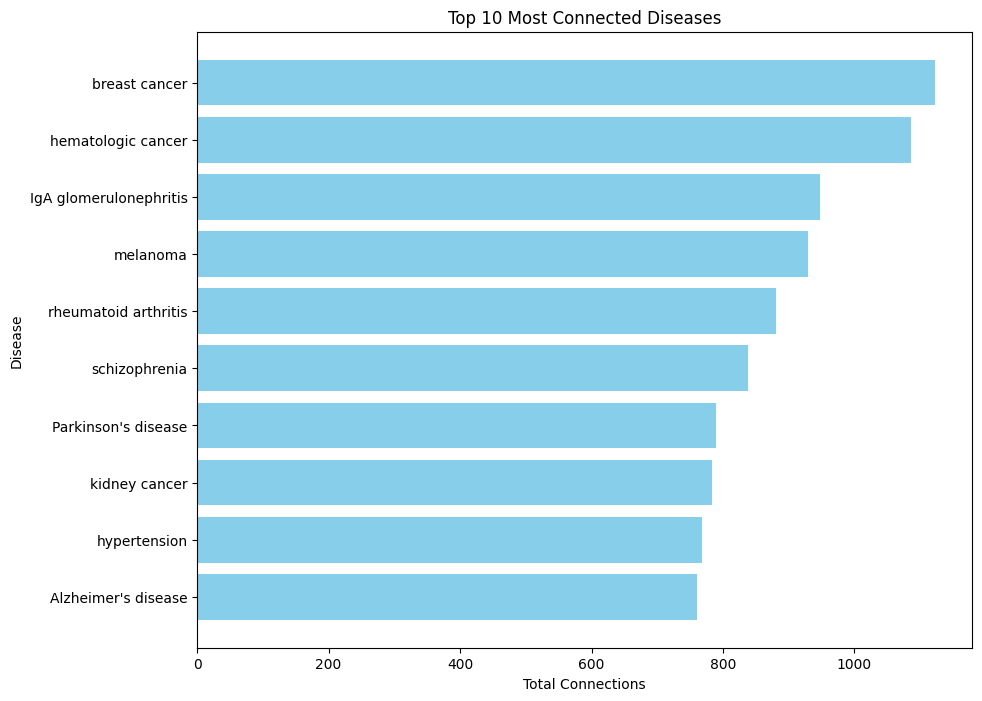

In [68]:
# visualization in a bar plot of the 10 most connected diseases
top_10_diseases = most_connected_diseases[:10]

disease_names = [G.nodes[disease[0]]['name'] for disease in top_10_diseases]
total_degrees = [disease[1] for disease in top_10_diseases]

plt.figure(figsize=(10, 8))
plt.barh(disease_names, total_degrees, color='skyblue')
plt.xlabel('Total Connections')
plt.ylabel('Disease')
plt.title('Top 10 Most Connected Diseases')
plt.gca().invert_yaxis()
plt.show()

Now we will compute the subgraph of “Disease” and “Symptom” and the average number of connections between a disease and a symptom.

In [69]:
# computing the subgraph of Diseases and Symptoms
disease_symptom_nodes = [node for node, data in G.nodes(data=True) 
                         if data['kind'] in ['Disease', 'Symptom']]
disease_symptom_subgraph = G.subgraph(disease_symptom_nodes)

total_edges = disease_symptom_subgraph.number_of_edges()
total_nodes = len(disease_symptom_nodes)
average_connections = total_edges / total_nodes if total_nodes else 0

print(f"Average number of connections between a disease and a symptom: {average_connections}")

Average number of connections between a disease and a symptom: 6.782608695652174


Now, let's visualize our subgraph


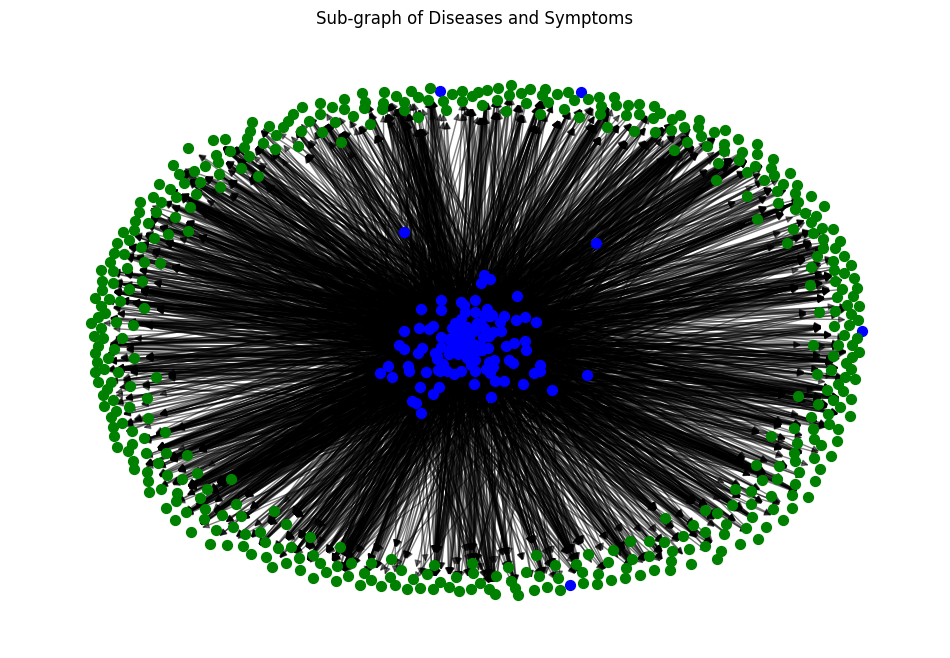

DiGraph with 575 nodes and 3900 edges


In [70]:
# visualizing the subgraph we have just created
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(disease_symptom_subgraph)

disease_nodes = [node for node, data in disease_symptom_subgraph.nodes(data=True) if data['kind'] == 'Disease']
symptom_nodes = [node for node, data in disease_symptom_subgraph.nodes(data=True) if data['kind'] == 'Symptom']

nx.draw_networkx_nodes(disease_symptom_subgraph, pos, nodelist=disease_nodes, node_color='b', node_size=50)
nx.draw_networkx_nodes(disease_symptom_subgraph, pos, nodelist=symptom_nodes, node_color='g', node_size=50)

plt.gca().set_facecolor('white')

nx.draw_networkx_edges(disease_symptom_subgraph, pos, alpha=0.5)

plt.title('Sub-graph of Diseases and Symptoms')
plt.axis('off')
plt.show()
print (disease_symptom_subgraph)

To understand more the dynamics of the over relations in the total graph, let's visualize other subgraphs.


<Figure size 1200x800 with 0 Axes>

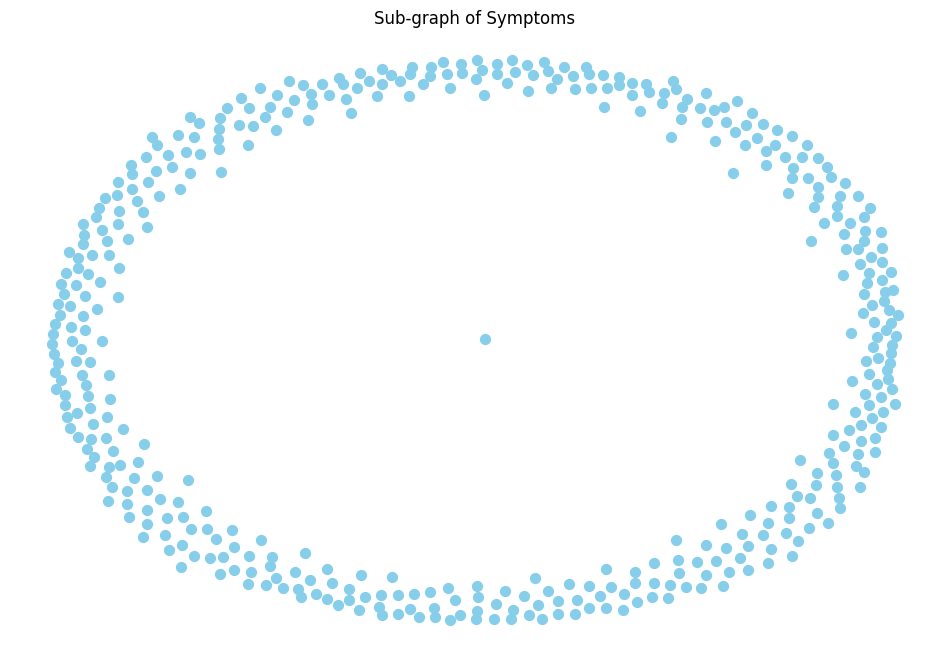

In [71]:
# plotting and visualizing the subgraph containing only Symptoms
symptom_nodes = [node for node, data in G.nodes(data=True) if data['kind'] == 'Symptom']
symptom_subgraph = G.subgraph(symptom_nodes)

plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(symptom_subgraph)
nx.draw_networkx_nodes(symptom_subgraph, pos, node_color='skyblue', node_size=50)
nx.draw_networkx_edges(symptom_subgraph, pos, alpha=0.5)
plt.title('Sub-graph of Symptoms')
plt.axis('off')
plt.show()

Clearly, we observe that the symptoms have no direct connections to each other. 

Let's take a look to the subgraph of only diseases

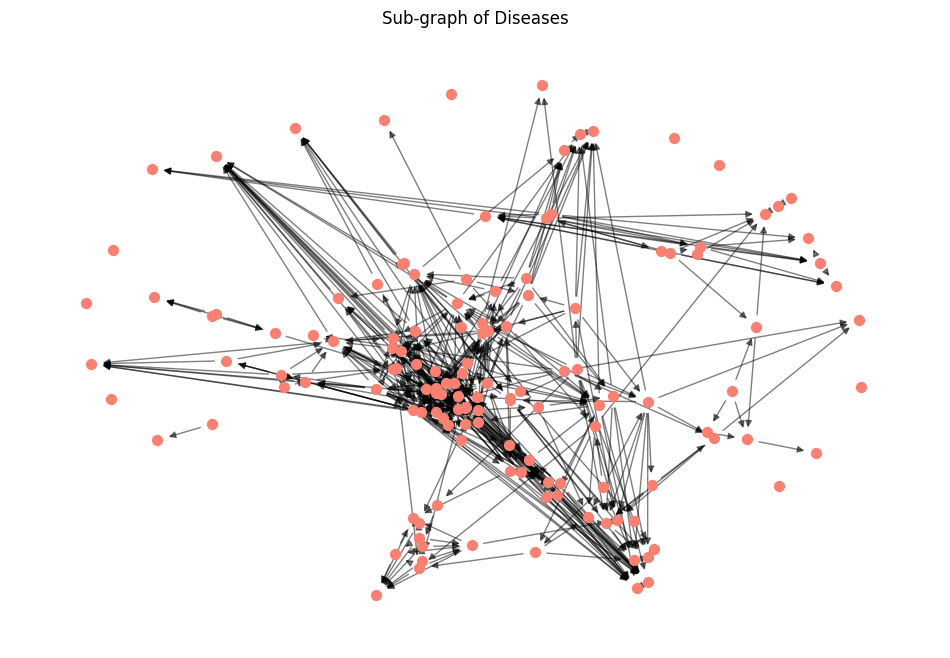

In [72]:
# plotting and visualizing the sub-graph containing only Diseases
disease_nodes = [node for node, data in G.nodes(data=True) if data['kind'] == 'Disease']
disease_subgraph = G.subgraph(disease_nodes)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(disease_subgraph)
nx.draw_networkx_nodes(disease_subgraph, pos, node_color='salmon', node_size=50)
nx.draw_networkx_edges(disease_subgraph, pos, alpha=0.5)
plt.title('Sub-graph of Diseases')
plt.axis('off')
plt.show()

There is a varied situation, some nodes are deeply connected to their neighbors, while others are completely disattached. 

### Task 2.2

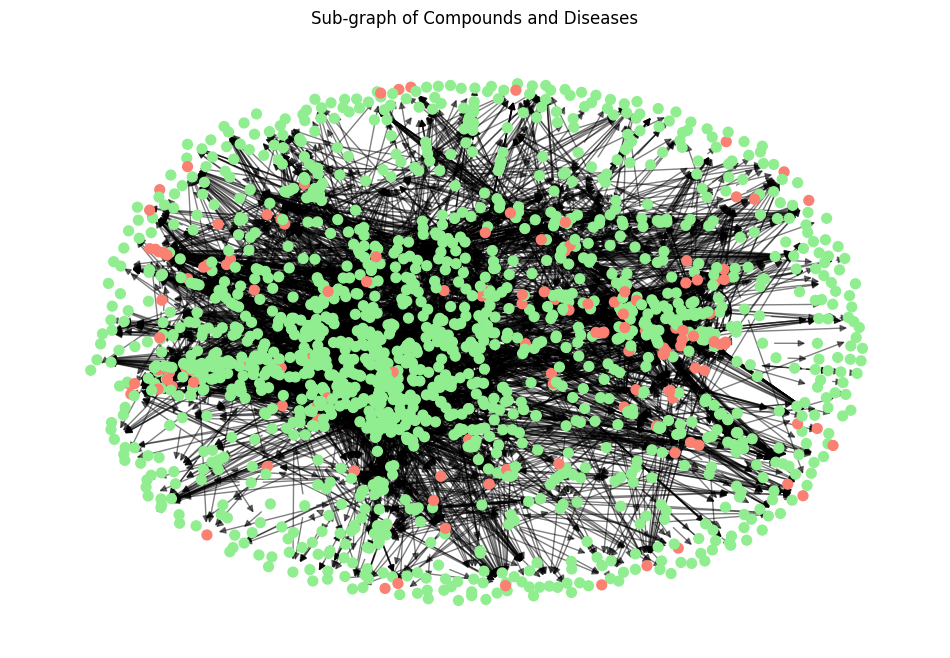

In [73]:
# plotting and visualizing the subgraph containing only Compounds and Diseases
compound_disease_nodes = [node for node, data in G.nodes(data=True) if data['kind'] in ['Compound', 'Disease']]
compound_disease_subgraph = G.subgraph(compound_disease_nodes)

plt.figure(figsize=(12, 8))

pos = nx.spring_layout(compound_disease_subgraph)

node_colors = ['lightgreen' if G.nodes[node]['kind'] == 'Compound' else 'salmon' for node in compound_disease_subgraph.nodes]
nx.draw_networkx_nodes(compound_disease_subgraph, pos, node_color=node_colors, node_size=50)

nx.draw_networkx_edges(compound_disease_subgraph, pos, alpha=0.5)

plt.title('Sub-graph of Compounds and Diseases')
plt.axis('off')
plt.show()

These subgraphs, together with the sub-graph of “Disease” and “Symptom”, are essential for the determination of the values'validity obtained in the following tasks.

### Task 2.3 & 2.4: 

In [74]:
# finding IDs of the target nodes (type 1 and 2 diabetes mellitus, eye pain and blindness)
def find_node_id(graph, name):
    for node, data in graph.nodes(data=True):
        if data.get('name') == name:
            return node
    return None

type1_diabetes_id = find_node_id(G, "type 1 diabetes mellitus")
type2_diabetes_id = find_node_id(G, "type 2 diabetes mellitus")
eye_pain_id = find_node_id(G, "Eye Pain")
blindness_id = find_node_id(G, "Blindness")

(type1_diabetes_id, type2_diabetes_id, eye_pain_id, blindness_id)

('Disease::DOID:9744',
 'Disease::DOID:9352',
 'Symptom::D058447',
 'Side Effect::C0456909')

We choose to implement the Jaccard index in order to compute similarity among different diseases and symptoms. As a matter of fact, the Jaccard index indee measures similarities based on the shared neighbors of two nodes. In our context of diseases and symptoms, two diseases sharing many symptoms should have a high Jaccard similarity, which could suggest a relationship or perhaps common underlying causes between the diseases.

In [75]:
# defining a function to compute Jaccard similarity
def jaccard_similarity_directed(graph, node1, node2):
    successors_node1 = set(graph.successors(node1))
    successors_node2 = set(graph.successors(node2))
    predecessors_node1 = set(graph.predecessors(node1))
    predecessors_node2 = set(graph.predecessors(node2))
    
    intersection_successors = successors_node1.intersection(successors_node2)
    union_successors = successors_node1.union(successors_node2)
    intersection_predecessors = predecessors_node1.intersection(predecessors_node2)
    union_predecessors = predecessors_node1.union(predecessors_node2)
    
    intersection = intersection_successors.union(intersection_predecessors)
    union = union_successors.union(union_predecessors)
    
    jaccard_sim = len(intersection) / len(union) if union else 0
    
    return jaccard_sim

In [76]:
# computing Jaccard similarity between type 1 diabetes mellitus and type 2 diabetes mellitus
similarity_score_diabetes = jaccard_similarity_directed(disease_symptom_subgraph,'Disease::DOID:9744','Disease::DOID:9352')
print ('The Jaccard similarity between type 1 diabetes mellitus and type 2 diabetes mellitus is:', similarity_score_diabetes)

The Jaccard similarity between type 1 diabetes mellitus and type 2 diabetes mellitus is: 0.1590909090909091


In [77]:
# computing Jaccard similarity between eye pain and blindness
similarity_score_eye = jaccard_similarity_directed(disease_symptom_subgraph, 'Symptom::D058447', 'Symptom::D001766')
print(f"The Jaccard similarity between eye pain and blindness is: {similarity_score_eye}")

# computing jaccard similarity between eye pain and shoulder pain
similarity_score_eye_shoulder = jaccard_similarity_directed(disease_symptom_subgraph, 'Symptom::D058447', 'Symptom::D020069')
print(f"The Jaccard similarity between eye pain and shoulder pain is: {similarity_score_eye_shoulder}")

The Jaccard similarity between eye pain and blindness is: 0.35
The Jaccard similarity between eye pain and shoulder pain is: 0.06666666666666667


Intuitively, eye pain and blindess are two strongly correlated symptoms, so their similarity value should be relatively higher than others. To confirm this thesis, we have computed the similarity of eye pain together with shoulder pain, a symptom which rarely is related with eye pain. In fact , we have observed that this last value is less 5 times more than eye pain - blindess similarity.

## Task 2.5
### Final Challenge:
Its essential to determine and prevent deseases, especially in old men. More than 50% of patients with lung cancer are diagnosed after the age of 65, and 30% are older than age 70. In addition, lung cancer is responsible for more deaths than colon, breast, and prostate cancer combined.


In [78]:
# finding all symptom names
symptom_names = [data['name'] for node, data in G.nodes(data=True) if data['kind'] == 'Symptom']
print(symptom_names)

['Abdomen, Acute', 'Adie Syndrome', 'Adrenoleukodystrophy', 'Aerophagy', 'Ageusia', 'Agnosia', 'Agraphia', 'Albuminuria', 'Alcohol Amnestic Disorder', 'Alkalosis, Respiratory', 'Amblyopia', 'Amnesia', 'Amnesia, Retrograde', 'Angina Pectoris', 'Angina Pectoris, Variant', 'Angina, Unstable', 'Anomia', 'Anorexia', 'Olfaction Disorders', 'Anoxia', 'Aphasia', 'Aphasia, Broca', 'Aphasia, Wernicke', 'Aphonia', 'Apnea', 'Apraxias', 'Articulation Disorders', 'Asthenia', 'Ataxia', 'Ataxia Telangiectasia', 'Athetosis', 'Auditory Perceptual Disorders', 'Back Pain', 'Birth Weight', 'Urinary Bladder, Neurogenic', 'Blindness', 'Body Temperature Changes', 'Body Weight', 'Body Weight Changes', 'Brain Death', 'Bulimia', 'Cachexia', 'Cardiac Output, Low', 'Catalepsy', 'Cataplexy', 'Catatonia', 'Causalgia', 'Cerebellar Ataxia', 'Cerebrospinal Fluid Otorrhea', 'Cerebrospinal Fluid Rhinorrhea', 'Chest Pain', 'Cheyne-Stokes Respiration', 'Chorea', 'Choroid Hemorrhage', 'Colic', 'Color Vision Defects', 'Coma'

In [79]:
# finding all the diseases related to each symptom
symptoms = [(node, data['name']) for node, data in G.nodes(data=True) if 'kind' in data and data['kind'] == "Symptom"]

diseases_per_symptom = {}

for symptom_id, symptom_name in symptoms:
    diseases_sympt = []
    predecessors = G.predecessors(symptom_id)
    for predecessor in predecessors:
        if 'name' in G.nodes[predecessor]:  
            diseases_sympt.append(G.nodes[predecessor]['name'])
    diseases_per_symptom[symptom_name] = diseases_sympt

for symptom_name, diseases_sympt in diseases_per_symptom.items():
    print(f"Diseases related to '{symptom_name}': {diseases_sympt}")

Diseases related to 'Abdomen, Acute': ['kidney cancer', 'acquired immunodeficiency syndrome', 'liver cancer', 'germ cell cancer', 'colon cancer', 'uterine fibroid', 'nephrolithiasis', 'adrenal gland cancer', 'celiac disease', 'anemia', 'abdominal aortic aneurysm', 'appendix cancer', 'gallbladder cancer', 'ovarian cancer', 'fallopian tube cancer', 'sarcoma', 'pancreatic cancer', 'retroperitoneal cancer', 'pancreatitis', "Crohn's disease", 'uterine cancer', 'testicular cancer', 'malignant mesothelioma', 'peritoneum cancer', 'jejunal cancer', 'duodenum cancer', 'systemic lupus erythematosus', 'ulcerative colitis', 'systemic scleroderma', 'stomach cancer', 'ileum cancer']
Diseases related to 'Adie Syndrome': ['rheumatoid arthritis', 'migraine']
Diseases related to 'Adrenoleukodystrophy': ['multiple sclerosis', 'bipolar disorder']
Diseases related to 'Aerophagy': ['Gilles de la Tourette syndrome']
Diseases related to 'Ageusia': ['peripheral nervous system neoplasm', 'multiple sclerosis', 'l

Let's imagine an old patient with the symptom 'Constipation'. We are interested to check if there is probability that it is developing a 'lung cancer'.


In [80]:
# given the name of a symptom as input, finding all the diseases connected to it
diseases_list=[]
patient_symptom = 'Constipation'
print(f"Patient has experienced symptoms: {patient_symptom}","\n","Possible diseases:") 


diseases_sympt = diseases_per_symptom[patient_symptom]
for disease_name in diseases_sympt:
        diseases_list.append(disease_name)
        print(f"-{disease_name}")


Patient has experienced symptoms: Constipation 
 Possible diseases:
-lung cancer
-uterine fibroid
-Crohn's disease
-prostate cancer
-uterine cancer
-hypothyroidism
-endogenous depression
-ulcerative colitis
-germ cell cancer
-systemic scleroderma
-retroperitoneal cancer
-celiac disease
-colon cancer
-autistic disorder
-stomach cancer
-Parkinson's disease
-rectum cancer
-cervical cancer
-ovarian cancer
-multiple sclerosis
-peritoneum cancer


Now, we are going to find which diseases may be connected to, and find which one has the lower compound number. For those, we are going to count the probability that this patient has this deasease depending on the symptoms computing the ratio between patient symptoms and the disease's list of symptoms. 

In [81]:
# starting from the previous list of diseases, finding how many compounds there are to treat each of them
def count_compounds(G, diseases_list):
    disease_compound_counts = {}
    for disease_name in diseases_list:
        disease_id = next((node for node, data in G.nodes(data=True) if 'name' in data and data['name'] == disease_name and data['kind'] == 'Disease'), None)
        if disease_id is not None:
            predecessors = G.predecessors(disease_id)
            compound_count = sum(1 for predecessor in predecessors if G.nodes[predecessor].get('kind', '') == 'Compound')
            disease_compound_counts[disease_name] = compound_count
        else:
            print(f"Disease '{disease_name}' not found in the graph.")
            disease_compound_counts[disease_name] = 0
    
    sorted_disease_compound_counts = dict(sorted(disease_compound_counts.items(), key=lambda item: item[1]))
    
    return sorted_disease_compound_counts

sorted_disease_compound_counts = count_compounds(G, diseases_list)
print(sorted_disease_compound_counts)

{'uterine fibroid': 0, 'retroperitoneal cancer': 0, 'celiac disease': 0, 'rectum cancer': 0, 'peritoneum cancer': 0, 'cervical cancer': 1, 'hypothyroidism': 4, 'uterine cancer': 7, 'germ cell cancer': 7, "Crohn's disease": 8, 'autistic disorder': 8, 'colon cancer': 9, 'stomach cancer': 9, 'ovarian cancer': 10, 'endogenous depression': 15, 'ulcerative colitis': 16, 'lung cancer': 17, 'systemic scleroderma': 25, "Parkinson's disease": 28, 'prostate cancer': 30, 'multiple sclerosis': 33}


Fortunately, there are many compounds for lung cancer. Let's analyse which might be some possible solutions.

In [82]:
# given a disease name as input, finding the possible compounds that cure it
compounds = []
def find_compound_of_disease(G, disease_name):
    print(f"The patient was diagnosed with:'{disease_name}'","\n","Following there are the associated compounds:")
    disease_id = next((node for node, data in G.nodes(data=True) if 'name' in data and data['name'] == disease_name), None)
    if disease_id is not None:
        predecessors = G.predecessors(disease_id)
        for compound_id in predecessors:
            if 'kind' in G.nodes[compound_id] and G.nodes[compound_id]['kind'] == 'Compound':
                compound_name = G.nodes[compound_id].get('name', 'Unknown')
                compounds.append(compound_name)
        if len(compounds) > 0:
            for compound_name in compounds:
                print(f"-{compound_name}")
        else:
            print(f"No compound found for disease '{disease_name}'.")
    else:
        print(f"Disease '{disease_name}' not found in the graph.")
        
disease_name='lung cancer'
find_compound_of_disease(G, disease_name)

The patient was diagnosed with:'lung cancer' 
 Following there are the associated compounds:
-Erlotinib
-Methotrexate
-Pemetrexed
-Irinotecan
-Doxorubicin
-Gemcitabine
-Cisplatin
-Etoposide
-Paclitaxel
-Crizotinib
-Docetaxel
-Teniposide
-Vinblastine
-Gefitinib
-Vinorelbine
-Topotecan
-Fentanyl


From this list, we should choose compounds that have less side effects possible.

In [83]:
# starting from the previous list of compounds, finding how many side effects each of them may create
def count_side_effects(G, compound_names):
    compound_side_effect_counts = {}
    for compound_name in compound_names:
        compound_id = next((node for node, data in G.nodes(data=True) if 'name' in data and data['name'] == compound_name and data['kind'] == 'Compound'), None)
        if compound_id is not None:
            successors = G.successors(compound_id)
            side_effect_count = sum(1 for side_effect in successors if G.nodes[side_effect].get('kind', '') == 'Side Effect')
            compound_side_effect_counts[compound_name] = side_effect_count
        else:
            print(f"Compound '{compound_name}' not found in the graph.")
            compound_side_effect_counts[compound_name] = 0
            
    sorted_compound_side_effect_counts = dict(sorted(compound_side_effect_counts.items(), key=lambda item: item[1]))
    
    return sorted_compound_side_effect_counts

sorted_compound_side_effect_counts = count_side_effects(G, compounds)
print(sorted_compound_side_effect_counts)

{'Vinblastine': 59, 'Teniposide': 70, 'Crizotinib': 99, 'Topotecan': 111, 'Pemetrexed': 124, 'Gefitinib': 126, 'Erlotinib': 152, 'Etoposide': 153, 'Vinorelbine': 164, 'Cisplatin': 169, 'Irinotecan': 177, 'Gemcitabine': 189, 'Docetaxel': 297, 'Methotrexate': 319, 'Paclitaxel': 442, 'Doxorubicin': 511, 'Fentanyl': 521}


From these results, we conclude that an optimal solution is to prescribe Vinblastine.